In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
x, y = make_moons(100, noise=0.25, random_state=2)

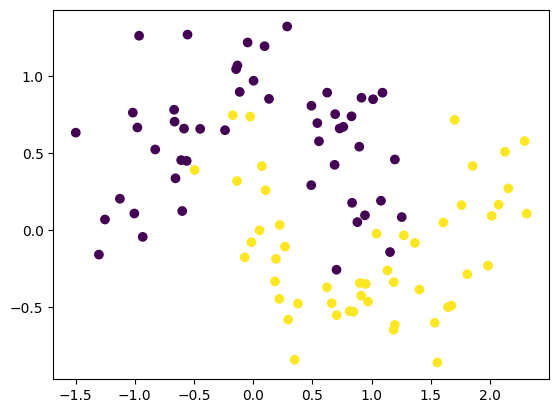

In [5]:
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

In [6]:
model_1 = Sequential()

model_1.add(Dense(128, activation='relu', input_dim=2))
model_1.add(Dense(128, activation='relu'))
model_1.add(Dense(1, activation='sigmoid'))

model_1.summary()

C:\Users\Parth\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
adam = Adam(learning_rate=0.01)

model_1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history_1 = model_1.fit(x, y, epochs=2000, validation_split=0.2, verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


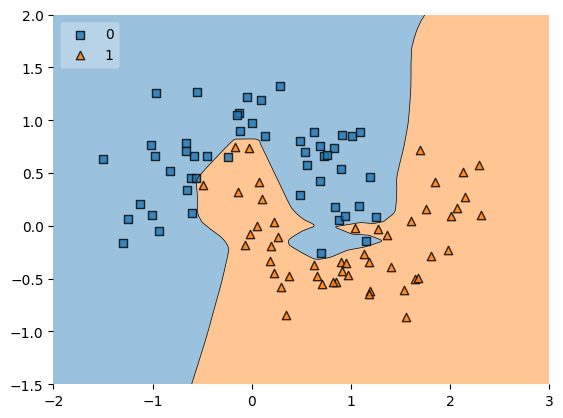

In [9]:
plot_decision_regions(x, y.astype('int'), clf=model_1, legend=2)
plt.xlim(-2, 3)
plt.ylim(-1.5, 2)
plt.show()

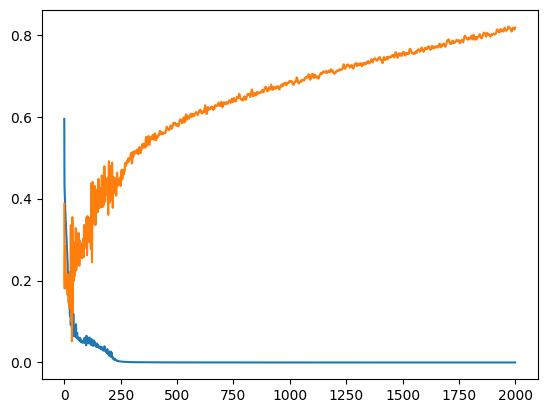

In [10]:
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])

## Using regularization

In [12]:
model_2 = Sequential()

model_2.add(Dense(128, activation='relu', input_dim=2, kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model_2.add(Dense(128, activation='relu', kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model_2.add(Dense(1, activation='sigmoid'))

model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
adam_2 = Adam(learning_rate=0.01)

model_2.compile(loss='binary_crossentropy', optimizer=adam_2, metrics=['accuracy'])
history_2 = model_2.fit(x, y, epochs=2000, validation_split=0.2, verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step


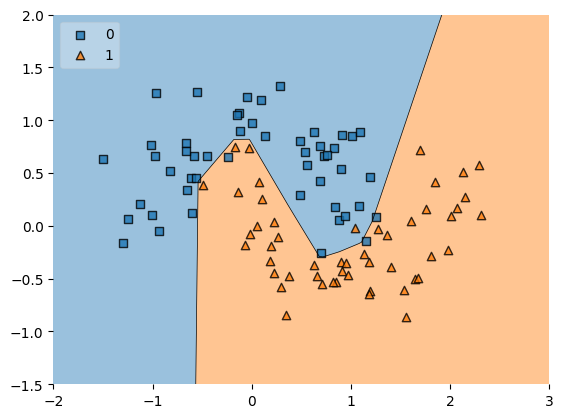

In [14]:
plot_decision_regions(x, y.astype('int'), clf=model_2, legend=2)
plt.xlim(-2, 3)
plt.ylim(-1.5, 2)
plt.show()

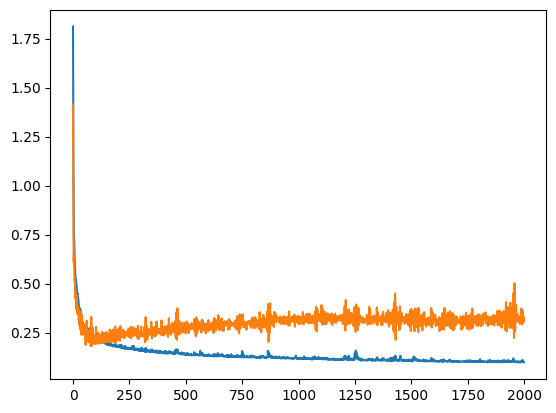

In [16]:
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.show()

In [17]:
model_1_weight_layer_1 = model_1.get_weights()[0].reshape(256)
model_2_weight_layer_2 = model_2.get_weights()[0].reshape(256)

<Axes: >

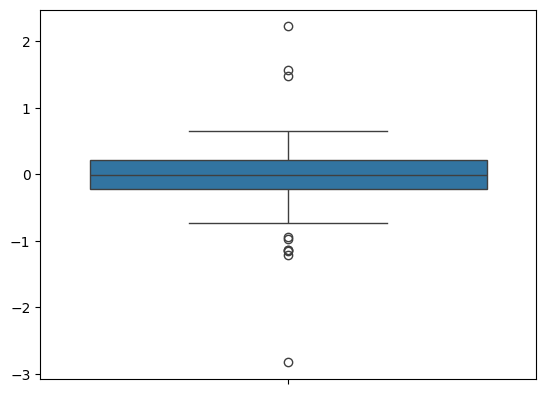

In [18]:
sns.boxplot(model_1_weight_layer_1)

<Axes: >

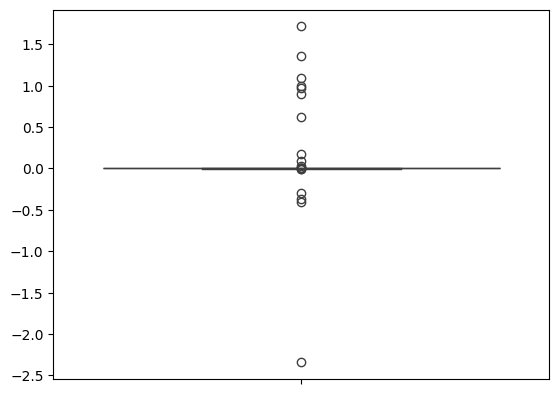

In [19]:
sns.boxplot(model_2_weight_layer_2)

In [21]:
print(f"Model 1 : Minimum {model_1_weight_layer_1.min()}, Maximum {model_1_weight_layer_1.max()}")

Model 1 : Minimum -2.8270175457000732, Maximum 2.2260186672210693


In [22]:
print(f"Model 2 : Minimum {model_2_weight_layer_2.min()}, Maximum {model_2_weight_layer_2.max()}")

Model 2 : Minimum -2.342196226119995, Maximum 1.7157251834869385


C:\Users\Parth\AppData\Local\Temp\ipykernel_19964\2746351882.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model_1_weight_layer_1)
C:\Users\Parth\AppData\Local\Temp\ipykernel_19964\2746351882.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model_2_weight_layer_2)


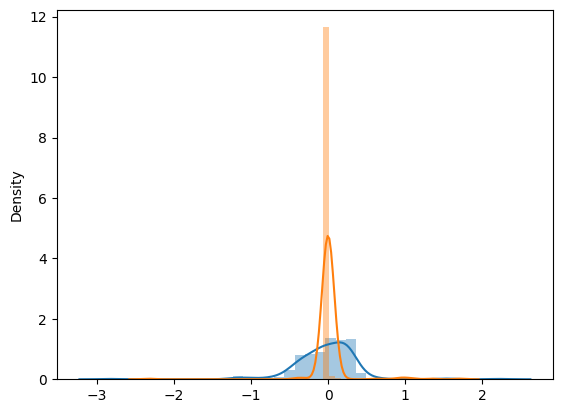

In [24]:
sns.distplot(model_1_weight_layer_1)
sns.distplot(model_2_weight_layer_2)
plt.show()

#### `NOTE` : **We can also use 'l1' or 'l2' regularization, generally 'l2' regularization gives better results than 'l1'**